In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("/content/drive/MyDrive/Projekt - Data Science /Customers.csv")
df

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6
...,...,...,...,...,...,...,...,...
1995,1996,Female,71,184387,40,Artist,8,7
1996,1997,Female,91,73158,32,Doctor,7,7
1997,1998,Male,87,90961,14,Healthcare,9,2
1998,1999,Male,77,182109,4,Executive,7,2


**Data Description**

---



The table contains 2000 customer data from a certain store, with columns as follows:
* Customer ID
* Gender
* Age
* Annual Income
* Spending Score - Score assigned by the shop, based on customer behavior and spending nature
* Profession
* Work Experience - in years
* Family Size

**Project Goal:**

The first goal of the project is to visualize all the data and separate out the incorrect ones.Then based on the remaining data a model will be created to estimate the Spending Score and to select optimal parameters. Finally the customers will be grouped for marketing purposes.

In [7]:
df.head(5)

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


In [8]:
df.tail(5)

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
1995,1996,Female,71,184387,40,Artist,8,7
1996,1997,Female,91,73158,32,Doctor,7,7
1997,1998,Male,87,90961,14,Healthcare,9,2
1998,1999,Male,77,182109,4,Executive,7,2
1999,2000,Male,90,110610,52,Entertainment,5,2




# Data Exploration and Visualization


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


In [15]:
df.describe()

,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,48.960000,110731.821500,50.962500,4.102500,3.768500
std,577.494589,28.429747,45739.536688,27.934661,3.922204,1.970749
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,500.750000,25.000000,74572.000000,28.000000,1.000000,2.000000
50%,1000.500000,48.000000,110045.000000,50.000000,3.000000,4.000000
75%,1500.250000,73.000000,149092.750000,75.000000,7.000000,5.000000
max,2000.000000,99.000000,189974.000000,100.000000,17.000000,9.000000


<Axes: xlabel='Family Size'>

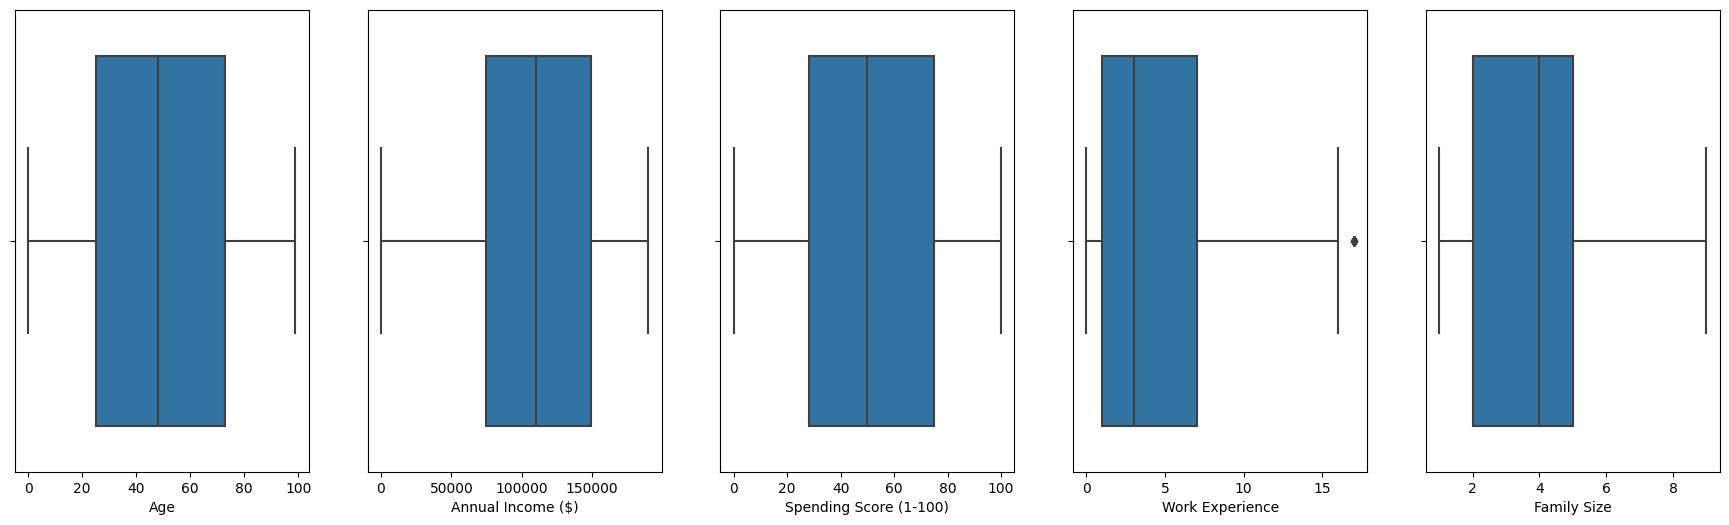

In [16]:
fig, (ax1,ax2,ax3, ax4, ax5) = plt.subplots(1,5,figsize=(22, 6))
sns.boxplot(x=df['Age'], ax=ax1)
sns.boxplot(x=df['Annual Income ($)'], ax=ax2)
sns.boxplot(x=df['Spending Score (1-100)'], ax=ax3)
sns.boxplot(x=df['Work Experience'], ax=ax4)
sns.boxplot(x=df['Family Size'], ax=ax5)

In [17]:
df.isnull().sum()

CustomerID                 0
Gender                     0
Age                        0
Annual Income ($)          0
Spending Score (1-100)     0
Profession                35
Work Experience            0
Family Size                0
dtype: int64

In [18]:
df.shape

(2000, 8)

Box plots represent the distribution of individual data points. Let's take a closer look at them to detect any possible anomalies. Outliers with a large range of values will be replaced with intervals.

# Gender Distribution

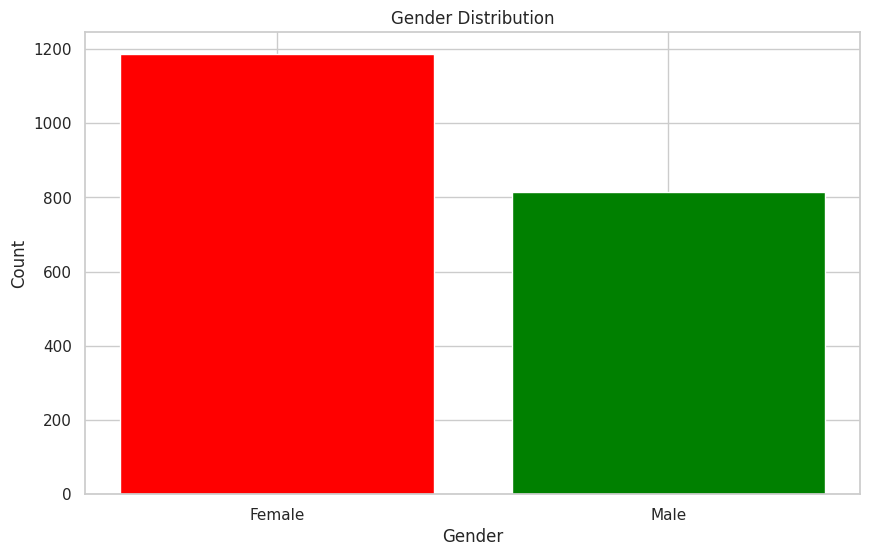

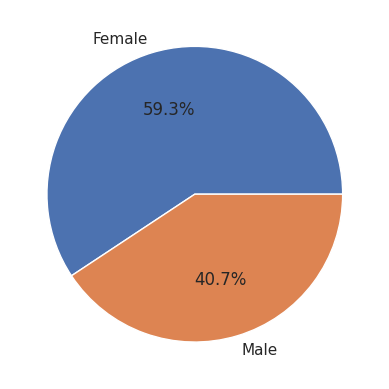

Gender
Female    1186
Male       814
Name: Gender, dtype: int64


In [19]:
sns.set(style="whitegrid")

gender_count = df["Gender"].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(gender_count.index, gender_count.values, color = ['red', 'green'])

plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

gender_count = df.groupby("Gender")["Gender"].count()
plt.pie(gender_count, labels=gender_count.index, autopct='%1.1f%%')
plt.show()

print(gender_count)

# Age Distribution


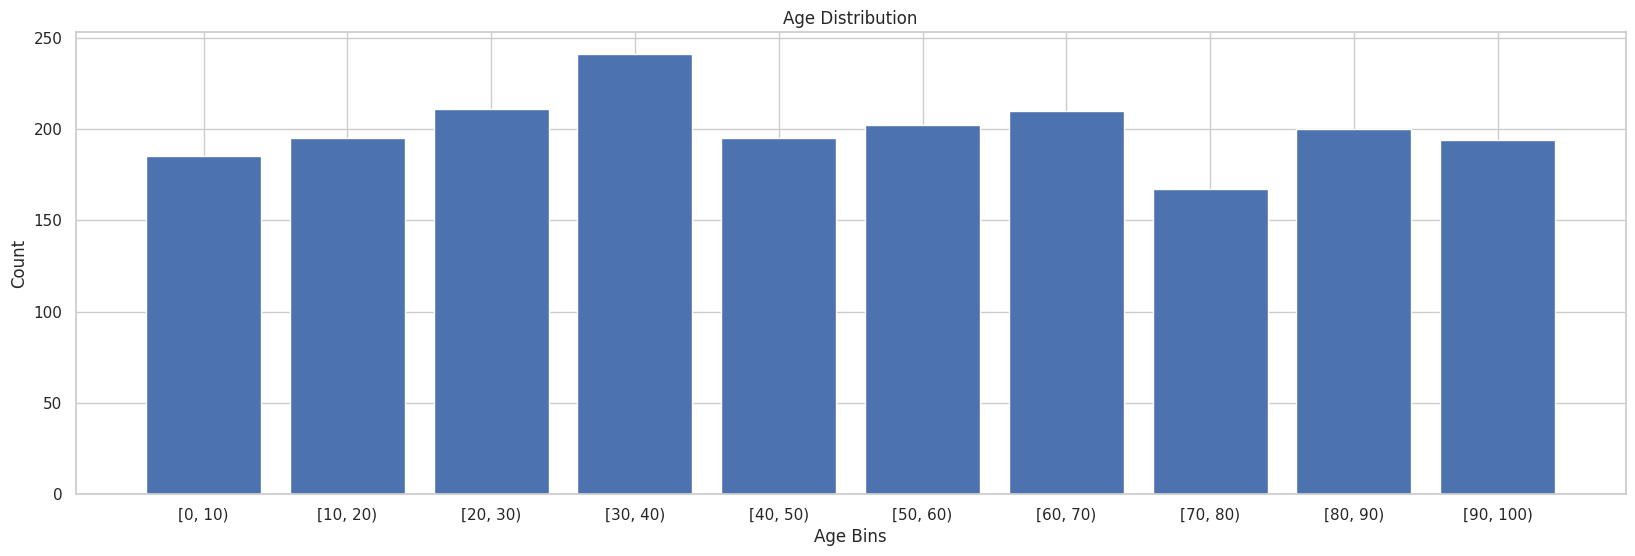

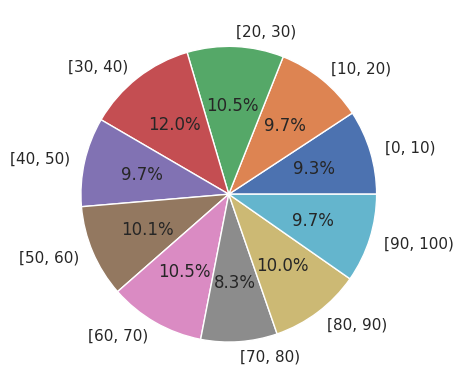

Age_Bins
[0, 10)      185
[10, 20)     195
[20, 30)     211
[30, 40)     241
[40, 50)     195
[50, 60)     202
[60, 70)     210
[70, 80)     167
[80, 90)     200
[90, 100)    194
Name: Age_Bins, dtype: int64


In [20]:
bins = pd.IntervalIndex.from_breaks(range(0, 101, 10), closed="left")
df["Age_Bins"] = pd.cut(df["Age"], bins=bins)
age_group = df["Age_Bins"].value_counts().sort_index()

age_labels = [f"[{i.left}, {i.right})" for i in age_group.index]
plt.figure(figsize=(20, 6))
plt.bar(age_labels, age_group.values)
plt.title("Age Distribution")
plt.xlabel("Age Bins")
plt.ylabel("Count")
plt.show()

age_group = df.groupby("Age_Bins")["Age_Bins"].count()
plt.pie(age_group, labels=age_labels, autopct='%1.1f%%')
plt.show()

print(age_group)

# Income Distribution

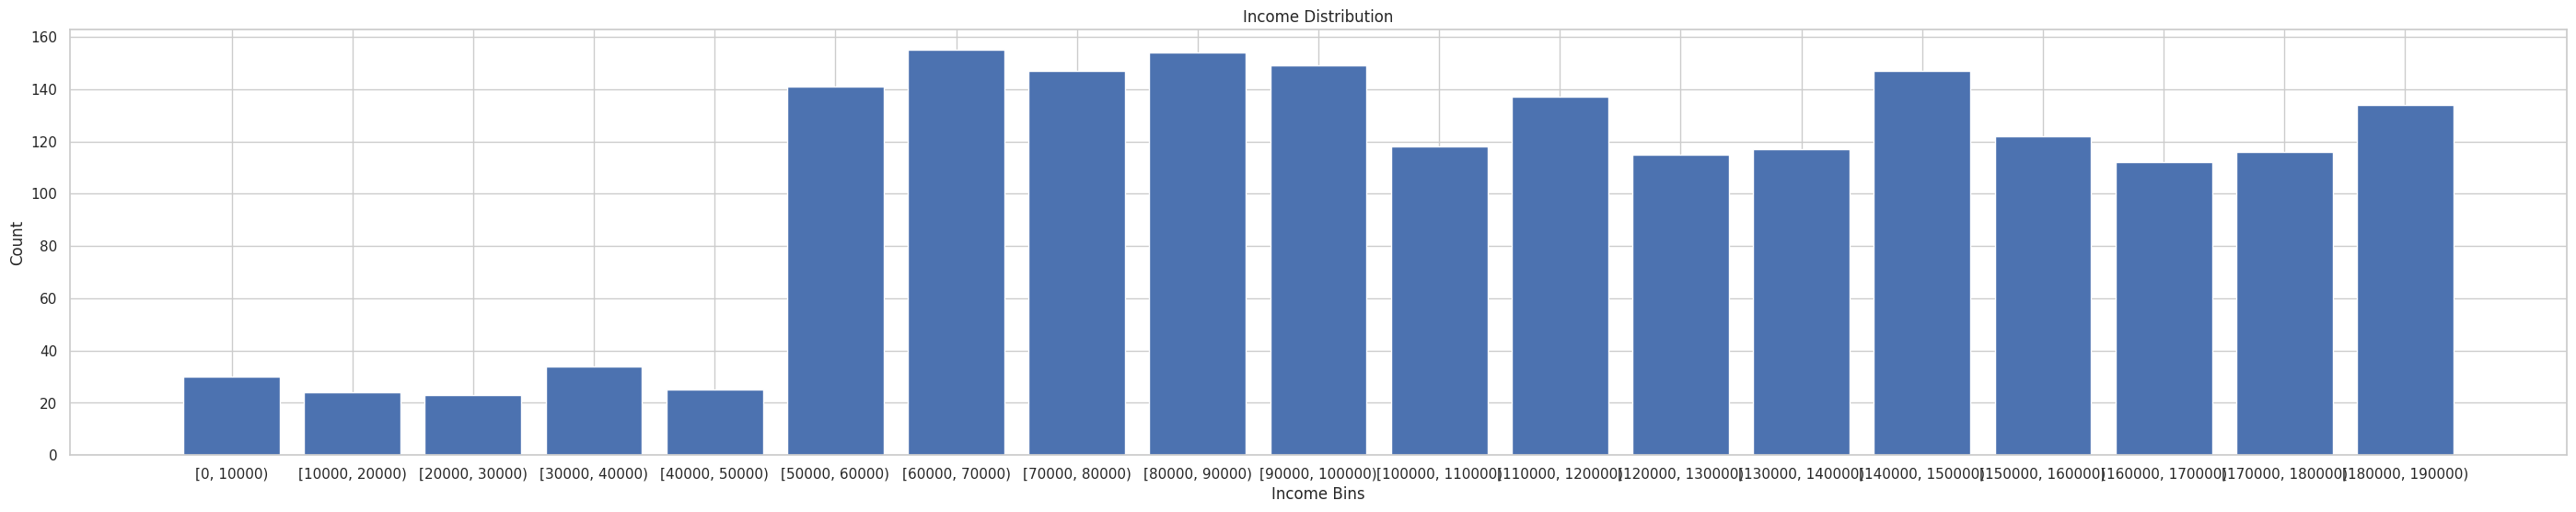

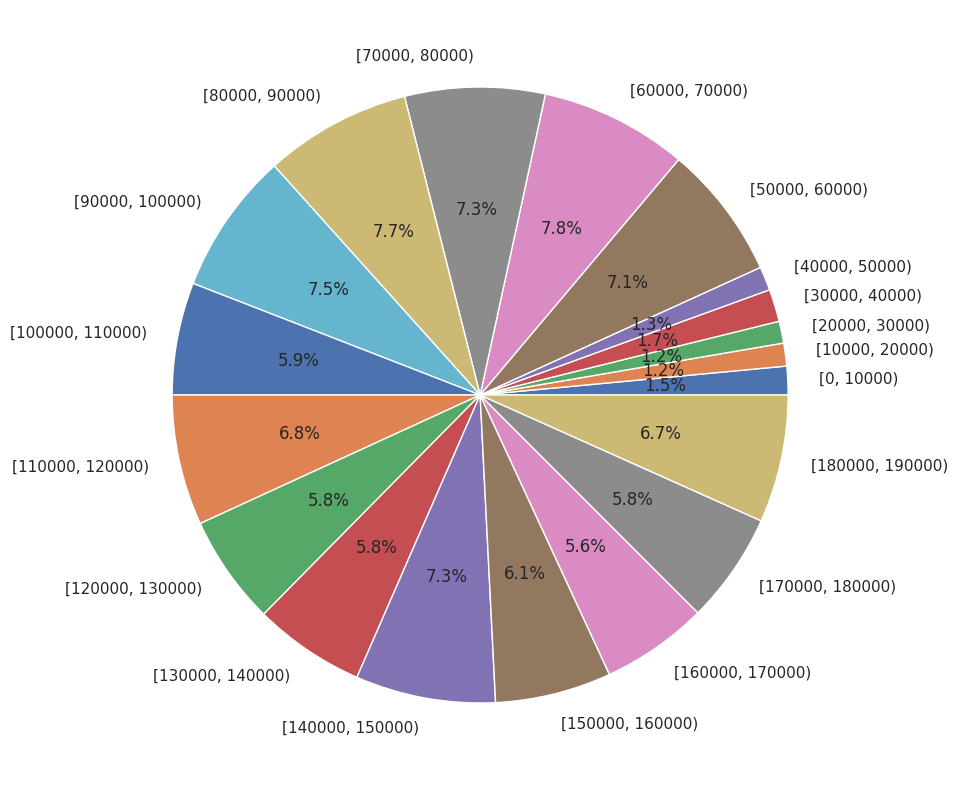

Annual Income ($) Bins
[0, 10000)           30
[10000, 20000)       24
[20000, 30000)       23
[30000, 40000)       34
[40000, 50000)       25
[50000, 60000)      141
[60000, 70000)      155
[70000, 80000)      147
[80000, 90000)      154
[90000, 100000)     149
[100000, 110000)    118
[110000, 120000)    137
[120000, 130000)    115
[130000, 140000)    117
[140000, 150000)    147
[150000, 160000)    122
[160000, 170000)    112
[170000, 180000)    116
[180000, 190000)    134
Name: Annual Income ($) Bins, dtype: int64


In [21]:
bins = pd.IntervalIndex.from_breaks(range(0, 200000, 10000), closed="left")
df["Annual Income ($) Bins"] = pd.cut(df["Annual Income ($)"], bins=bins)
income_group = df["Annual Income ($) Bins"].value_counts().sort_index()

income_labels = [f"[{i.left}, {i.right})" for i in income_group.index]
plt.figure(figsize=(35, 6))
plt.bar(income_labels, income_group.values)
plt.title("Income Distribution")
plt.xlabel("Income Bins")
plt.ylabel("Count")
plt.show()

income_group = df.groupby("Annual Income ($) Bins")["Annual Income ($) Bins"].count()
plt.figure(figsize=(10, 10))
plt.pie(income_group, labels=income_labels, autopct='%1.1f%%')
plt.show()

print(income_group)

# Profession Distribution

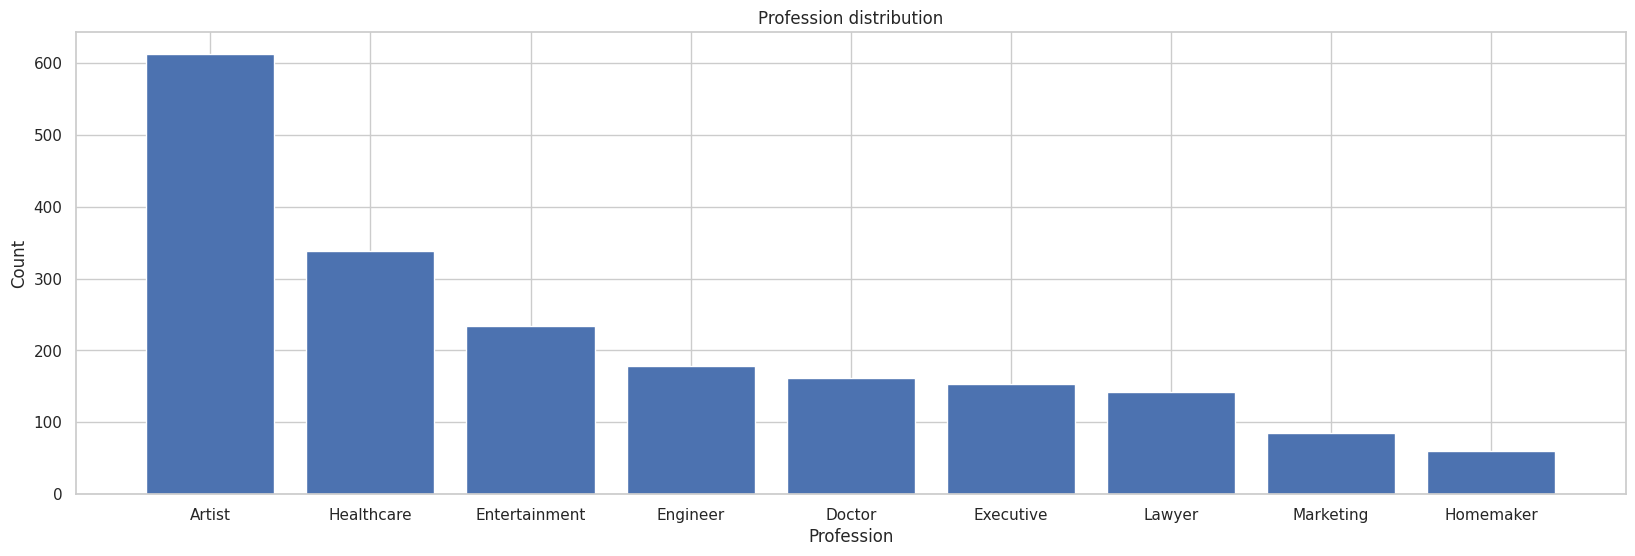

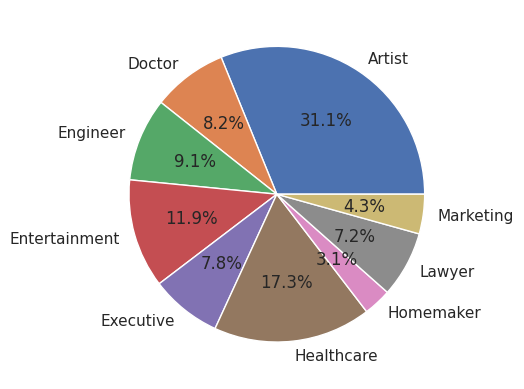

Artist           612
Healthcare       339
Entertainment    234
Engineer         179
Doctor           161
Executive        153
Lawyer           142
Marketing         85
Homemaker         60
Name: Profession, dtype: int64


In [22]:
profession_count = df["Profession"].value_counts()
plt.figure(figsize=(20, 6))
plt.bar(profession_count.index, profession_count.values)

plt.title("Profession distribution")
plt.xlabel("Profession")
plt.ylabel("Count")
plt.show()

profession_counts = df.groupby('Profession')['Profession'].count()
plt.pie(profession_counts, labels=profession_counts.index, autopct='%1.1f%%')
plt.show()

print(profession_count)

# Work Experience Distribution

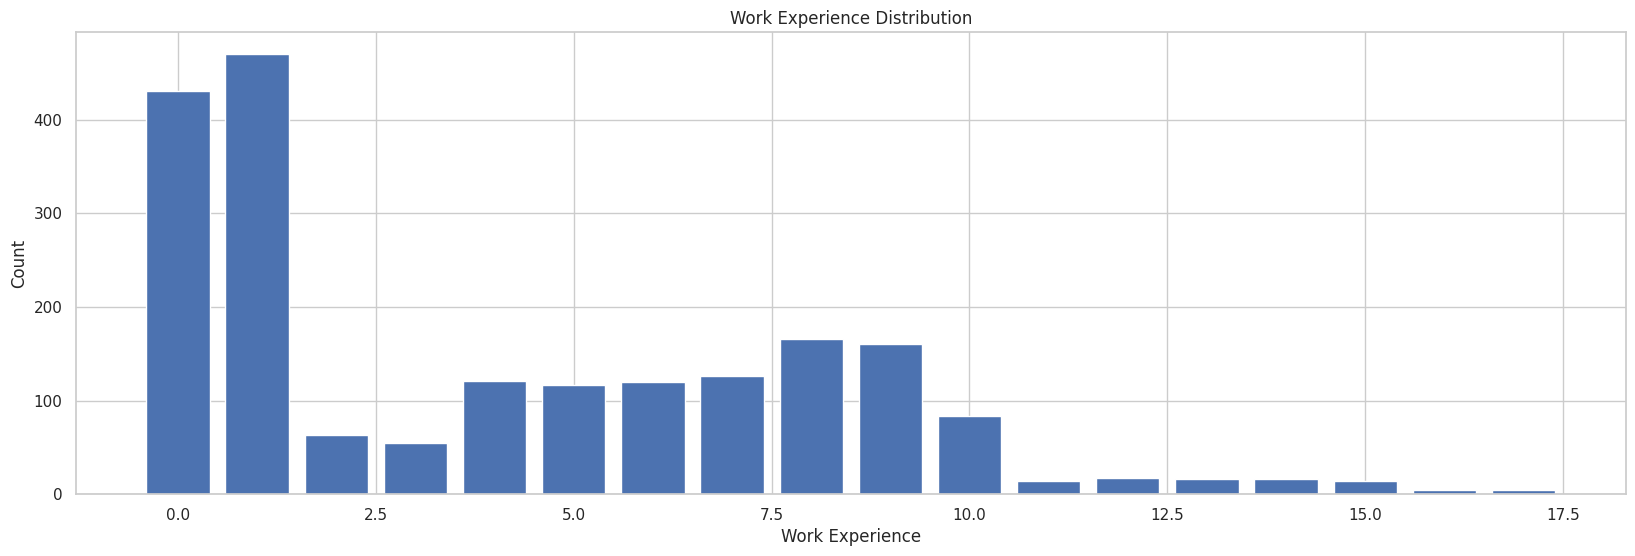

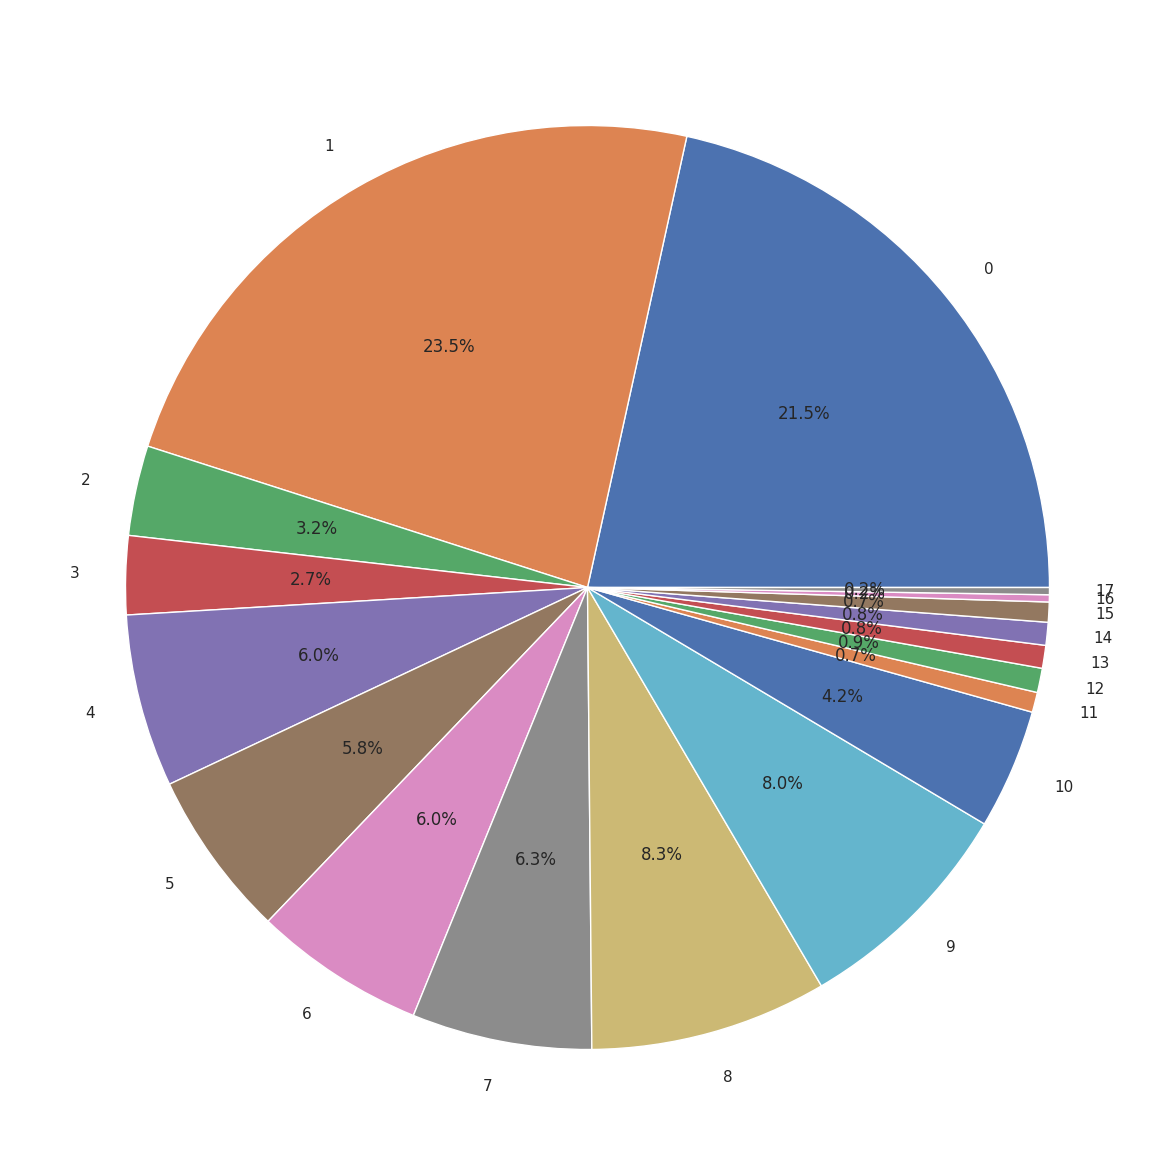

Work Experience
0     431
1     470
2      63
3      55
4     121
5     117
6     120
7     126
8     166
9     160
10     84
11     14
12     17
13     16
14     16
15     14
16      5
17      5
Name: Work Experience, dtype: int64


In [23]:
work_experience_count = df["Work Experience"].value_counts()
plt.figure(figsize=(20, 6))
plt.bar(work_experience_count.index, work_experience_count.values)

plt.title("Work Experience Distribution")
plt.xlabel("Work Experience")
plt.ylabel("Count")
plt.show()

work_experience_count = df.groupby("Work Experience")["Work Experience"].count()
plt.figure(figsize=(15,15))
plt.pie(work_experience_count, labels=work_experience_count.index, autopct='%1.1f%%')
plt.show()

print(work_experience_count)

# Family Size Distribution

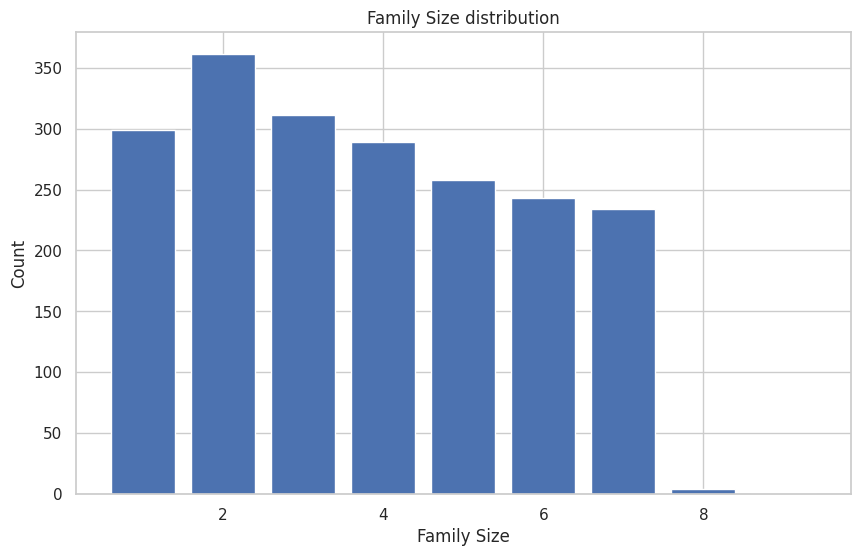

1    299
2    361
3    311
4    289
5    258
6    243
7    234
8      4
9      1
Name: Family Size, dtype: int64


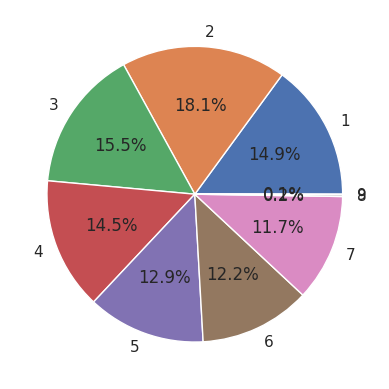

In [24]:
family_size_count = df["Family Size"].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(family_size_count.index, family_size_count.values)

plt.title("Family Size distribution")
plt.xlabel("Family Size")
plt.ylabel("Count")
plt.show()

print(family_size_count.sort_index())

family_size_count = df.groupby("Family Size")["Family Size"].count()
plt.pie(family_size_count, labels = family_size_count.index, autopct="%1.1f%%")
plt.show()

# Spending Score (1-100) Distribution

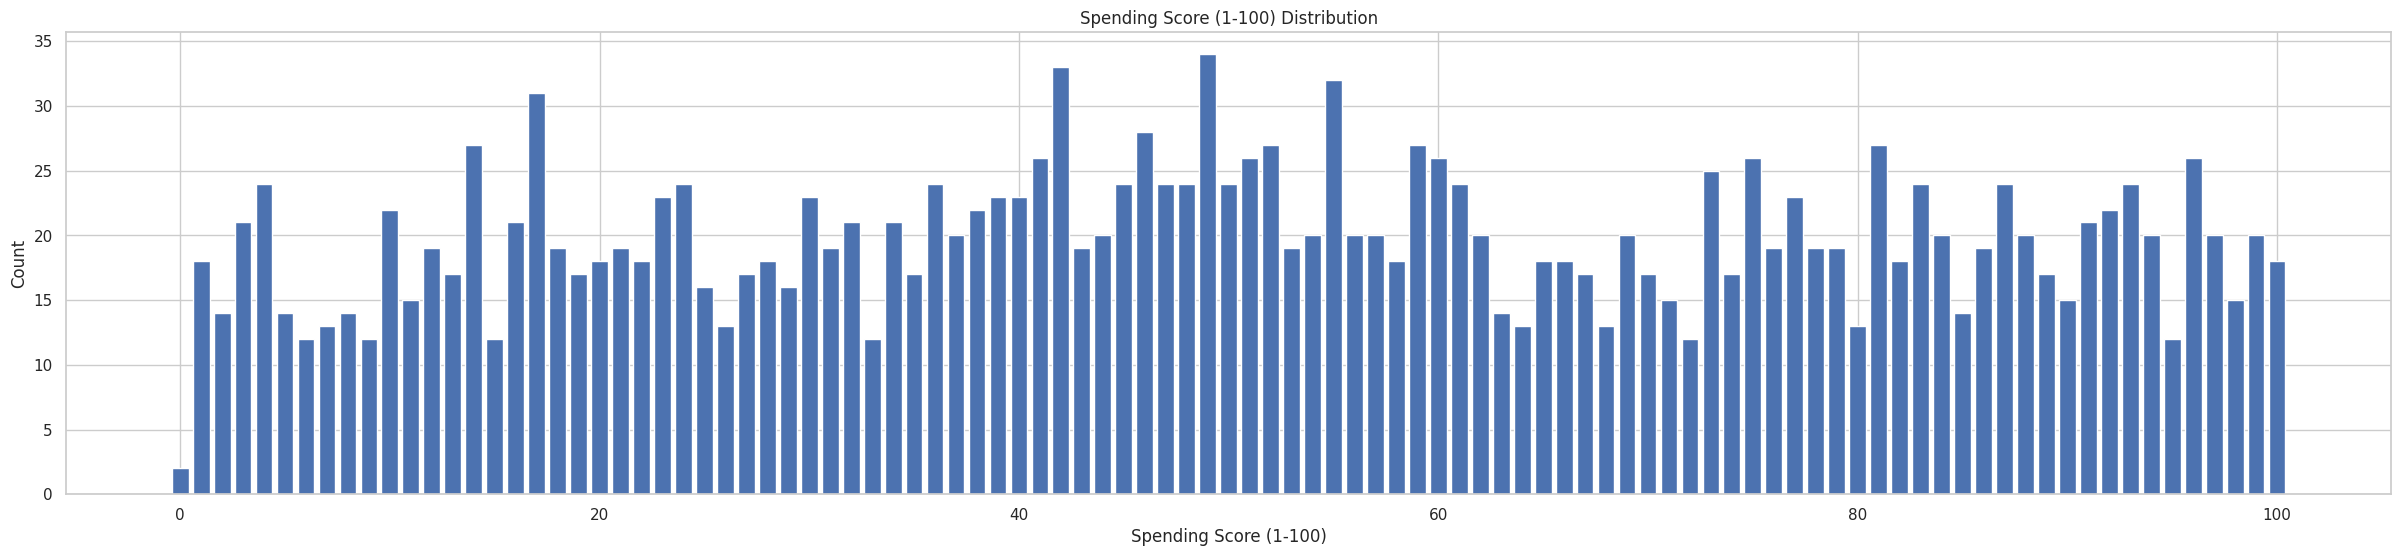

0       2
1      18
2      14
3      21
4      24
       ..
96     26
97     20
98     15
99     20
100    18
Name: Spending Score (1-100), Length: 101, dtype: int64


In [25]:
family_size_count = df["Spending Score (1-100)"].value_counts()
plt.figure(figsize=(30, 6))
plt.bar(family_size_count.index, family_size_count.values)

plt.title("Spending Score (1-100) Distribution")
plt.xlabel("Spending Score (1-100)")
plt.ylabel("Count")
plt.show()

print(family_size_count.sort_index())

# Age Relations

In [26]:
df_minor_age = df[df["Age"] < 18]

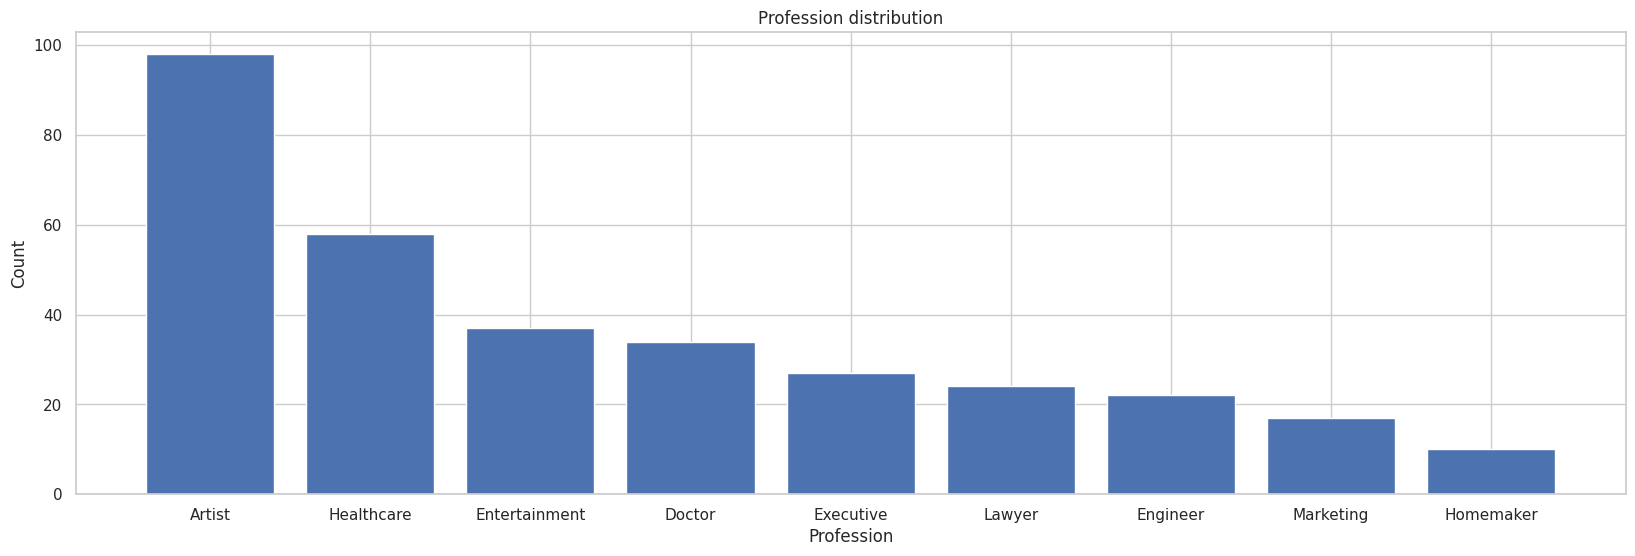

Artist           98
Healthcare       58
Entertainment    37
Doctor           34
Executive        27
Lawyer           24
Engineer         22
Marketing        17
Homemaker        10
Name: Profession, dtype: int64


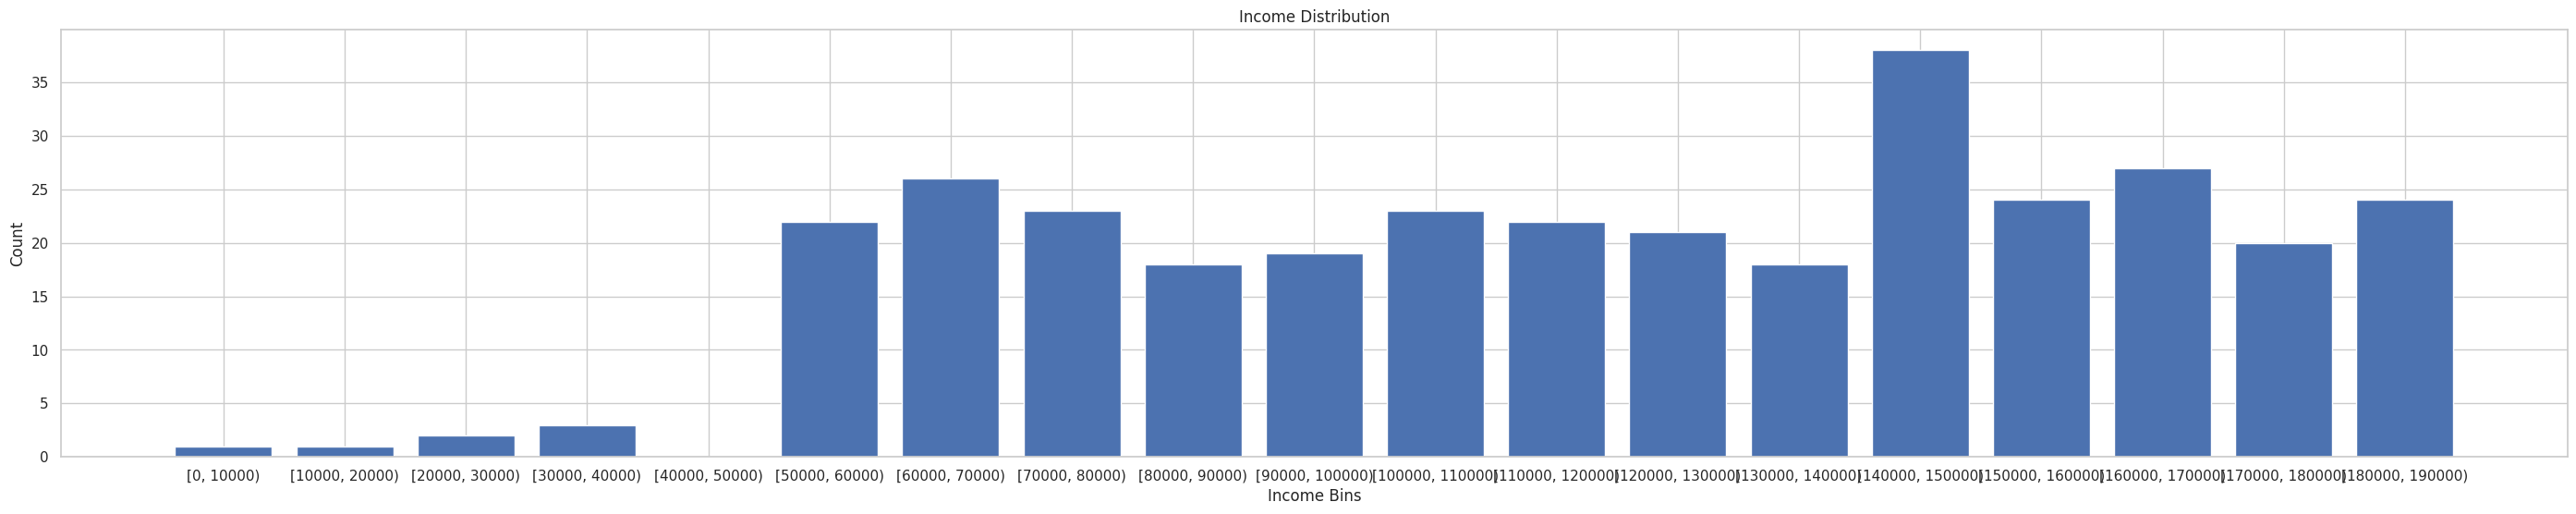

[0, 10000)           1
[10000, 20000)       1
[20000, 30000)       2
[30000, 40000)       3
[40000, 50000)       0
[50000, 60000)      22
[60000, 70000)      26
[70000, 80000)      23
[80000, 90000)      18
[90000, 100000)     19
[100000, 110000)    23
[110000, 120000)    22
[120000, 130000)    21
[130000, 140000)    18
[140000, 150000)    38
[150000, 160000)    24
[160000, 170000)    27
[170000, 180000)    20
[180000, 190000)    24
Name: Annual Income ($) Bins, dtype: int64


In [27]:
profession_count_underage = df_minor_age["Profession"].value_counts()
plt.figure(figsize=(20, 6))
plt.bar(profession_count_underage.index, profession_count_underage.values)
plt.title("Profession distribution")
plt.xlabel("Profession")
plt.ylabel("Count")
plt.show()

print(profession_count_underage)

income_group_underage = df_minor_age["Annual Income ($) Bins"].value_counts().sort_index()
income_labels = [f"[{i.left}, {i.right})" for i in income_group_underage.index]
plt.figure(figsize=(35, 6))
plt.bar(income_labels, income_group_underage.values)
plt.title("Income Distribution")
plt.xlabel("Income Bins")
plt.ylabel("Count")
plt.show()

print(income_group_underage)

In [28]:
df[df["Age"] - df["Work Experience"] < 0]

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size,Age_Bins,Annual Income ($) Bins
211,212,Female,0,22000,92,Artist,2,1,"[0, 10)","[20000, 30000)"
228,229,Male,0,33000,64,Marketing,1,1,"[0, 10)","[30000, 40000)"
230,231,Female,6,93000,53,Lawyer,8,2,"[0, 10)","[90000, 100000)"
234,235,Female,4,84000,54,Artist,9,1,"[0, 10)","[80000, 90000)"
321,322,Male,5,69078,60,Lawyer,13,1,"[0, 10)","[60000, 70000)"
...,...,...,...,...,...,...,...,...,...,...
1925,1926,Female,0,105935,46,Doctor,4,5,"[0, 10)","[100000, 110000)"
1926,1927,Male,3,74607,69,Healthcare,6,1,"[0, 10)","[70000, 80000)"
1951,1952,Male,1,57522,75,Artist,10,5,"[0, 10)","[50000, 60000)"
1979,1980,Male,0,165321,93,Doctor,8,1,"[0, 10)","[160000, 170000)"


In [29]:
df[df["Age"] - df["Work Experience"] < 18]

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size,Age_Bins,Annual Income ($) Bins
33,34,Male,18,62000,92,Homemaker,9,7,"[10, 20)","[60000, 70000)"
39,40,Female,20,69000,75,Artist,8,2,"[20, 30)","[60000, 70000)"
47,48,Female,27,71000,47,Healthcare,12,1,"[20, 30)","[70000, 80000)"
61,62,Male,19,50000,55,Artist,9,2,"[10, 20)","[50000, 60000)"
87,88,Female,22,55000,55,Artist,5,2,"[20, 30)","[50000, 60000)"
...,...,...,...,...,...,...,...,...,...,...
1979,1980,Male,0,165321,93,Doctor,8,1,"[0, 10)","[160000, 170000)"
1980,1981,Female,10,86925,76,Artist,7,2,"[10, 20)","[80000, 90000)"
1984,1985,Female,2,153622,51,Lawyer,6,6,"[0, 10)","[150000, 160000)"
1986,1987,Female,4,68094,61,Doctor,4,7,"[0, 10)","[60000, 70000)"


# Data preparation


First, let's notice that there are individuals with a profession despite being under age. Second, let's notice that there are individuals whose professional experience exceeds their age. Let's remove them.

In [30]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [31]:
df = df[(df["Age"] > 18) & (df["Age"] - df["Work Experience"] > 0)]

The column CustomerID is redundant as it is a unique customer identifier, and the columns Age and Annual Income ($) have been replaced with ranges to facilitate classification and regression tasks.

In [32]:
df.drop("CustomerID" , axis=1, inplace=True)
df.drop("Age", axis=1, inplace=True)
df.drop("Annual Income ($)", axis=1, inplace=True)

<ipython-input-32-739d8398ff82>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop("CustomerID" , axis=1, inplace=True)
<ipython-input-32-739d8398ff82>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop("Age", axis=1, inplace=True)
<ipython-input-32-739d8398ff82>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop("Annual Income ($)", axis=1, inplace=True)


In [33]:
cat_cols = ['Age_Bins', 'Annual Income ($) Bins']
obj_cols = ['Gender', 'Profession']

le = LabelEncoder()

for col in cat_cols:
    if df[col].dtype.name == 'category':
        df[col] = df[col].cat.codes
        
for col in obj_cols:
    df[col] = le.fit_transform(df[col])

<ipython-input-33-e68777aafa41>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].cat.codes
<ipython-input-33-e68777aafa41>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])
<ipython-input-33-e68777aafa41>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexi

<Axes: >

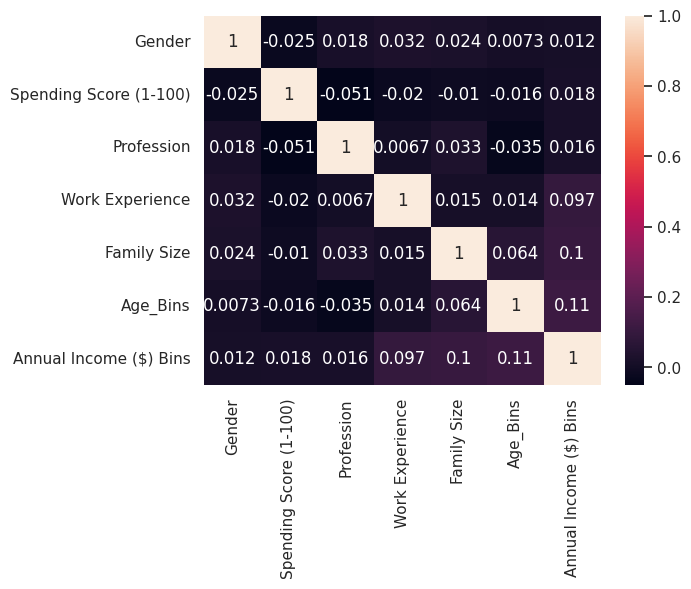

In [34]:
sns.heatmap(df.corr(), annot=True)

In [35]:
y = df["Spending Score (1-100)"]
X = df.drop("Spending Score (1-100)", axis=1)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True)

# Model To Predict Spending Score (1-100)


As we can see on the heatmap, there is no correlation between the variables. Nevertheless, attempts will be made to solve the problem of predicting the Spending Score (1-100) using machine learning models, with a sample set of parameters.

In [73]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [84]:
pipe_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LinearRegression()),
])

In [85]:
pipe_logr = Pipeline([
    ('scaler', StandardScaler()),
    ('logr', LogisticRegression()),
])

In [86]:
pipe_decision_tree_reg = Pipeline([
    ('scaler', StandardScaler()),
    ('dtr', DecisionTreeRegressor())
])

In [87]:
pipe_random_forest_reg = Pipeline([
    ('scaler', StandardScaler()),
    ('rfr', RandomForestRegressor())
])

In [88]:
pipe_xgbr = Pipeline([
    ('scaler', StandardScaler()),
    ('xgbr', XGBRegressor())
])

In [89]:
param_grid_lr = {
    'lr__fit_intercept':[True, False]
}

In [90]:
param_grid_logr = {
    'logr__penalty': [None, 'l2'],
    'logr__solver': ['newton-cg', 'newton-cholesky'],
    'logr__max_iter': [30, 50, 100, 500]
}

In [91]:
param_grid_decision_tree_reg = {
    'dtr__criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'dtr__max_depth': [1, 3, 5, 10],
    'dtr__min_samples_split': [2,3,5,10],
    'dtr__min_samples_leaf': [1,2,3,5,10],
    'dtr__max_features': [1,2,3,5,7]
}

In [92]:
param_grid_random_forest_reg = {
    'rfr__n_estimators': [10,15,30,50,100],
    'rfr__max_depth': [1, 3, 5, 10],
    'rfr__min_samples_split': [2,3,5,10],
    'rfr__min_samples_leaf': [1,2,3,5,10],
    'rfr__max_features': [1,2,3,5,7]
}

In [93]:
param_grid_xgbr = {
    'xgbr__max_depth': [3, 5, 7],
    'xgbr__n_estimators': [50, 100, 200]
}

In [94]:
 pipelines = {
    'Linear Regression': (pipe_lr, param_grid_lr),
    'Logistic Regression': (pipe_logr, param_grid_logr),
    'Decision Tree Regression': (pipe_decision_tree_reg, param_grid_decision_tree_reg),
    'Random Forest Regression': (pipe_random_forest_reg, param_grid_random_forest_reg),
    'XGB Regressor': (pipe_xgbr, param_grid_xgbr)
}

In [95]:
for name, (pipeline, parameters) in pipelines.items():
    grid_search = GridSearchCV(pipeline, parameters, cv=5)
    grid_search.fit(X_train, y_train)

    print(f"Best parameters for {name}: {grid_search.best_params_}")
    print(f"Training score for {name}: {grid_search.best_score_}")
    print(f"Test score for {name}: {grid_search.score(X_test, y_test)}")

Best parameters for Linear Regression: {'lr__fit_intercept': True}
Training score for Linear Regression: -0.0008480771698992529
Test score for Linear Regression: -0.004038097018030928


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best parameters for Logistic Regression: {'logr__max_iter': 30, 'logr__penalty': None, 'logr__solver': 'newton-cg'}
Training score for Logistic Regression: 0.016718515958059683
Test score for Logistic Regression: 0.0121580547112462
Best parameters for Decision Tree Regression: {'dtr__criterion': 'friedman_mse', 'dtr__max_depth': 1, 'dtr__max_features': 1, 'dtr__min_samples_leaf': 3, 'dtr__min_samples_split': 10}
Training score for Decision Tree Regression: -0.0011862839045316599
Test score for Decision Tree Regression: -0.008808091903612647


KeyboardInterrupt: ignored

**Conclusion:**

Based on the results, it can be concluded that linear regression and XGBoost models are not able to accurately estimate the point values of Spending Score. Both models achieve scores close to zero on both the training and test sets. It is possible that better data are needed to achieve better results.

# Model To Predict Spending Score (1-100) By Classification

Let's approach the problem differently and turn the regression problem into a classification problem. Let's consider Spending Score (1-100) as a group of customers with a score in the given range and then try to classify the customer with a certain accuracy.

In [106]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE

In [107]:
ranges = [10,20,25]
for k in ranges:
  bins = pd.IntervalIndex.from_breaks(range(0, 101, k), closed="left")
  
  y = pd.cut(df["Spending Score (1-100)"], bins=bins)
  y = y.cat.codes  
  X = df.drop("Spending Score (1-100)", axis=1)

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True)

  pipe_SVC = Pipeline([
      ('scaler', StandardScaler()),
      ('svc', SVC())
  ])

  pipe_kNN = Pipeline([
    ('scaler', StandardScaler()),
    ('kNN', KNeighborsClassifier())
  ])

  pipe_decision_tree_class = Pipeline([
      ('scaler', StandardScaler()),
      ('dtc', DecisionTreeClassifier())
  ])

  pipe_random_forest_class = Pipeline([
    ('scaler', StandardScaler()),
    ('rfc', RandomForestClassifier())
  ])

  param_grid_SVC = {
    'svc__C': [1, 3, 5, 7],
    'svc__kernel': ['linear', 'poly', 'rbf'],
    'svc__gamma': ['scale', 'auto']
  }

  param_grid_kNN = {
    'kNN__n_neighbors': [3, 5, 7],
    'kNN__weights': ['uniform', 'distance']
  }

  param_grid_decision_tree_class = {
    'dtc__criterion': ['gini', 'entropy', 'log_loss'],
    'dtc__max_depth': [1, 3, 5, 10],
    'dtc__min_samples_split': [2,3,5,10],
    'dtc__min_samples_leaf': [1,2,3,5,10],
    'dtc__max_features': [1,2,3,5,7]
  }

  param_grid_random_forest_class = {
    'rfc__n_estimators': [10,15,30,50,100],
    'rfc__max_depth': [1, 3, 5, 10],
    'rfc__min_samples_split': [2,3,5,10],
    'rfc__min_samples_leaf': [1,2,3,5,10],
    'rfc__max_features': [1,2,3,5,7]
  }

  pipelines = {
    'SVC': (pipe_SVC, param_grid_SVC),
    'K Neighbors Classifier': (pipe_kNN, param_grid_kNN),
    'Decision Tree Classifier': (pipe_decision_tree_class, param_grid_decision_tree_class),
    'Random Forest Classifier': (pipe_random_forest_class, param_grid_random_forest_class)
  }

  for name, (pipeline, parameters) in pipelines.items():
      grid_search = GridSearchCV(pipeline, parameters, cv=5)
      grid_search.fit(X_train, y_train)

      print(f"Best parameters for {name}: {grid_search.best_params_}")
      print(f"Training score for {name}: {grid_search.best_score_}")
      print(f"Test score for {name}: {grid_search.score(X_test, y_test)}")

Best parameters for SVC: {'svc__C': 5, 'svc__gamma': 'scale', 'svc__kernel': 'linear'}
Training score for SVC: 0.12460824979836387
Test score for SVC: 0.11854103343465046
Best parameters for K Neighbors Classifier: {'kNN__n_neighbors': 3, 'kNN__weights': 'uniform'}
Training score for K Neighbors Classifier: 0.10030533471598109
Test score for K Neighbors Classifier: 0.12158054711246201
Best parameters for Decision Tree Classifier: {'dtc__criterion': 'log_loss', 'dtc__max_depth': 3, 'dtc__max_features': 1, 'dtc__min_samples_leaf': 5, 'dtc__min_samples_split': 3}
Training score for Decision Tree Classifier: 0.1481823942850559
Test score for Decision Tree Classifier: 0.1033434650455927
Best parameters for SVC: {'svc__C': 1, 'svc__gamma': 'scale', 'svc__kernel': 'linear'}
Training score for SVC: 0.24544014287360297
Test score for SVC: 0.270516717325228
Best parameters for K Neighbors Classifier: {'kNN__n_neighbors': 3, 'kNN__weights': 'distance'}
Training score for K Neighbors Classifier: 0

**Conclusion:**

As we can see, we get better results but still far from good. This is most likely due to the randomness of the data, but we managed to present a comparison for the same problem when transforming from a regression problem to a classification one.

# Create K - Clusters

In the last step, let's cluster the data using the KMeans method and then present an example division into 5 groups using box plots to see the distribution of the data.

In [119]:
import time
from sklearn.cluster import KMeans

In [120]:
X = StandardScaler().fit_transform(df)

In [121]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

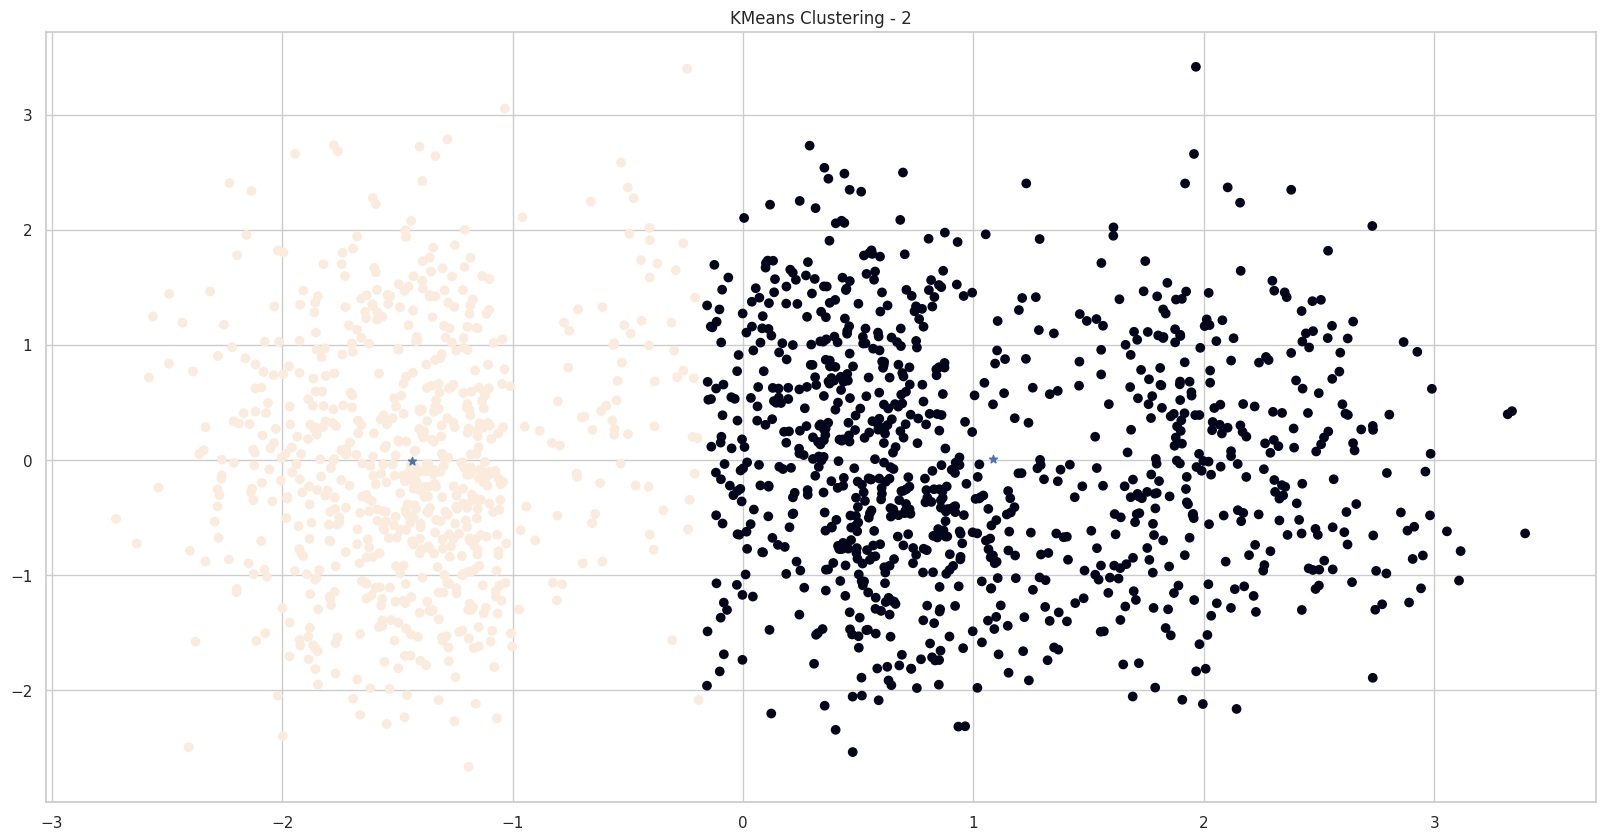

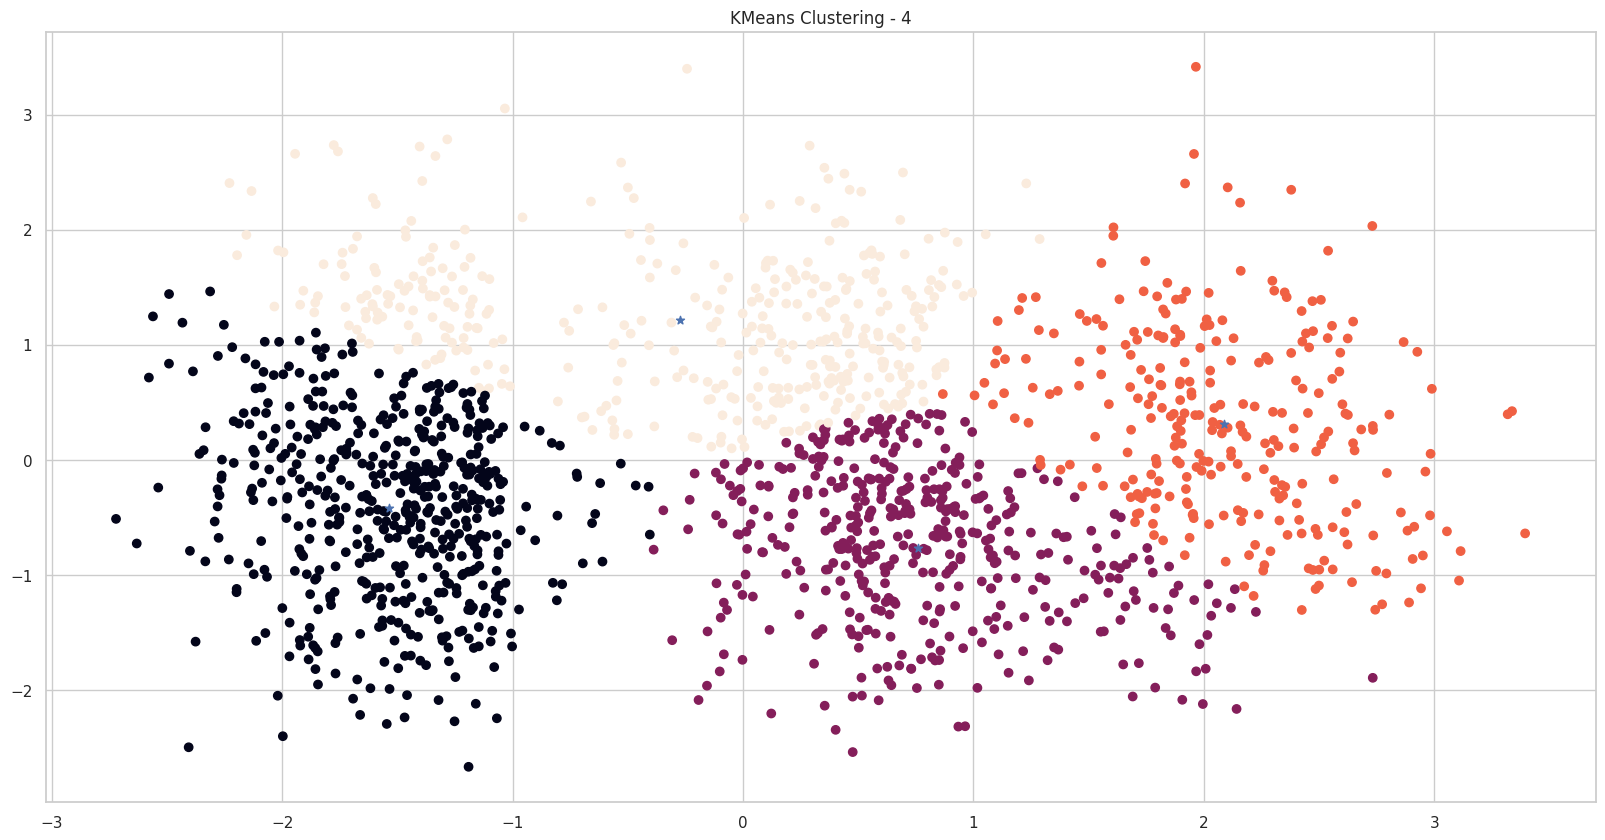

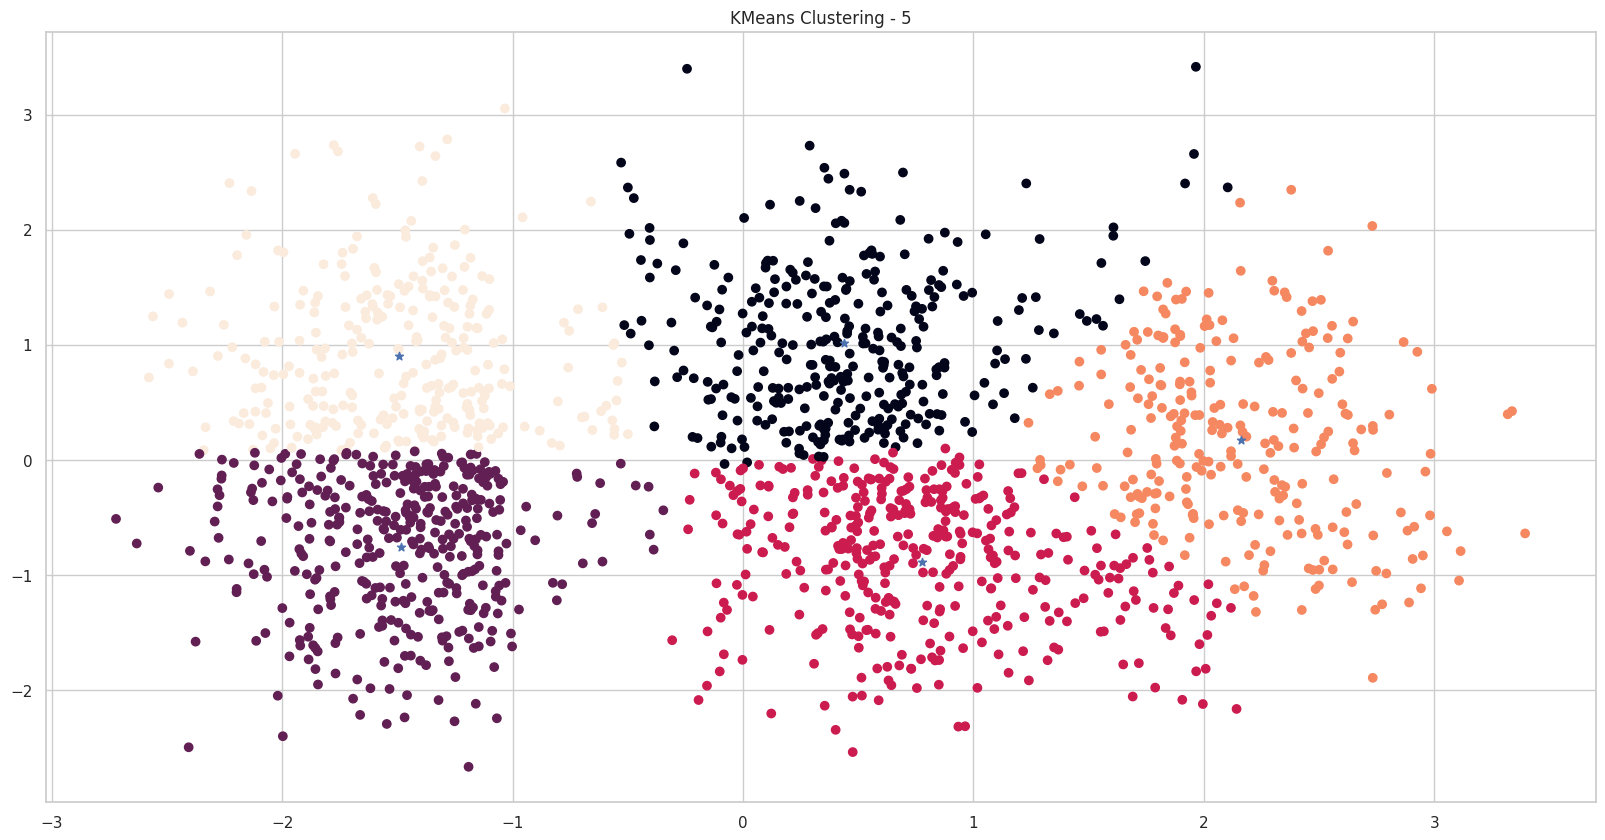

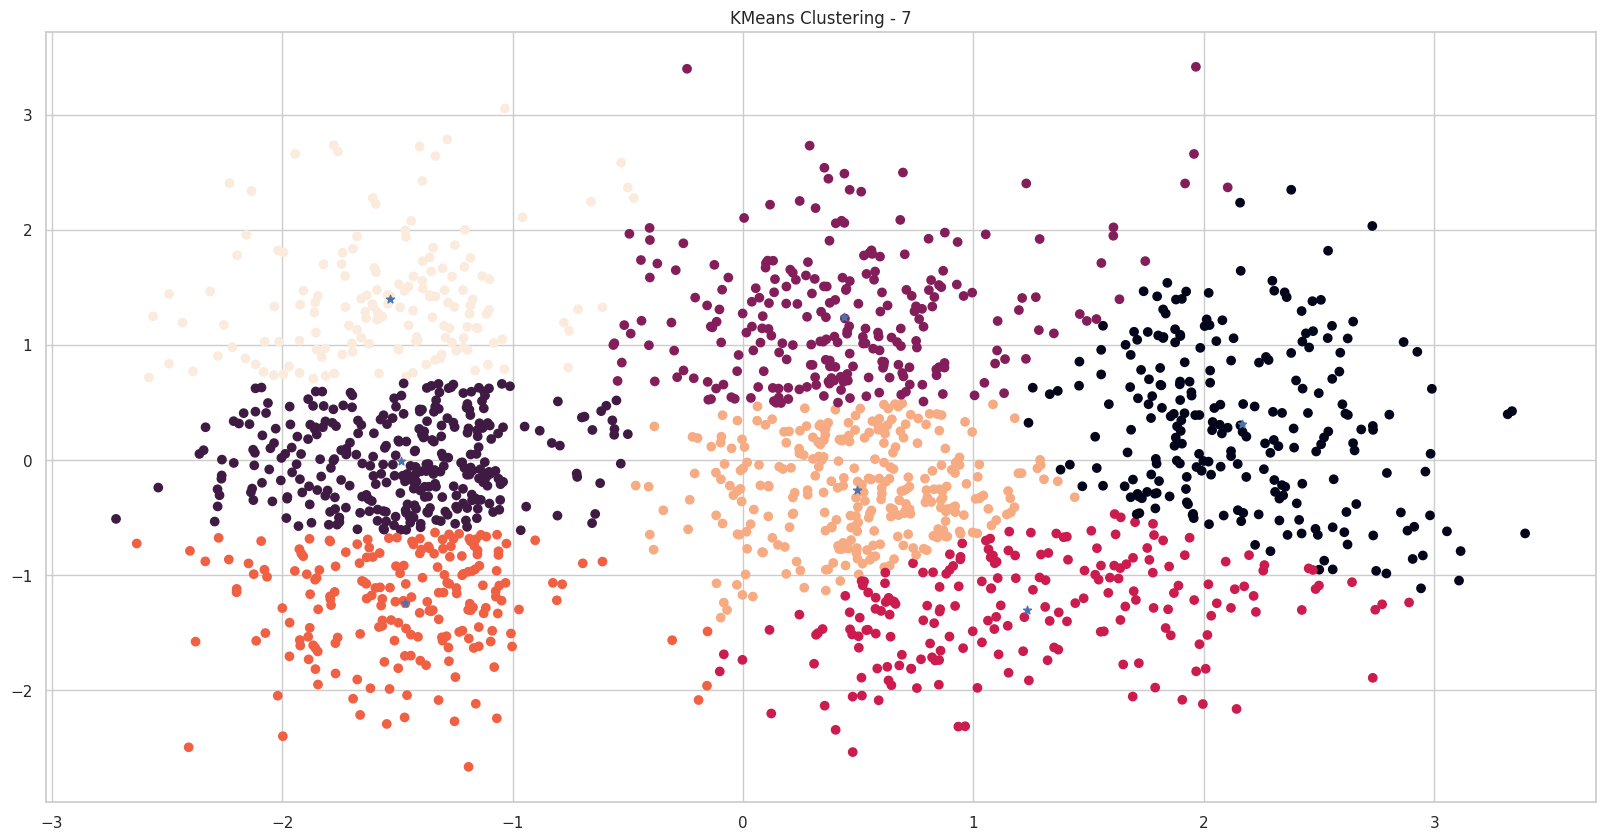

In [124]:
for k in [2,4,5,7]:
  kmeans = KMeans(n_clusters = k, n_init = 'auto')
  kmeans.fit(X_pca)
  labels = kmeans.labels_
  plt.figure(figsize=(20, 10))
  plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels)
  plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker = '*')
  plt.title(f'KMeans Clustering - {k}')
  plt.show()

In [123]:
  kmeans = KMeans(n_clusters = 5, n_init = 'auto')
  kmeans.fit(X_pca)

  df["Groups"] = kmeans.labels_

<ipython-input-123-882c98fda9d4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Groups"] = kmeans.labels_


Group 0


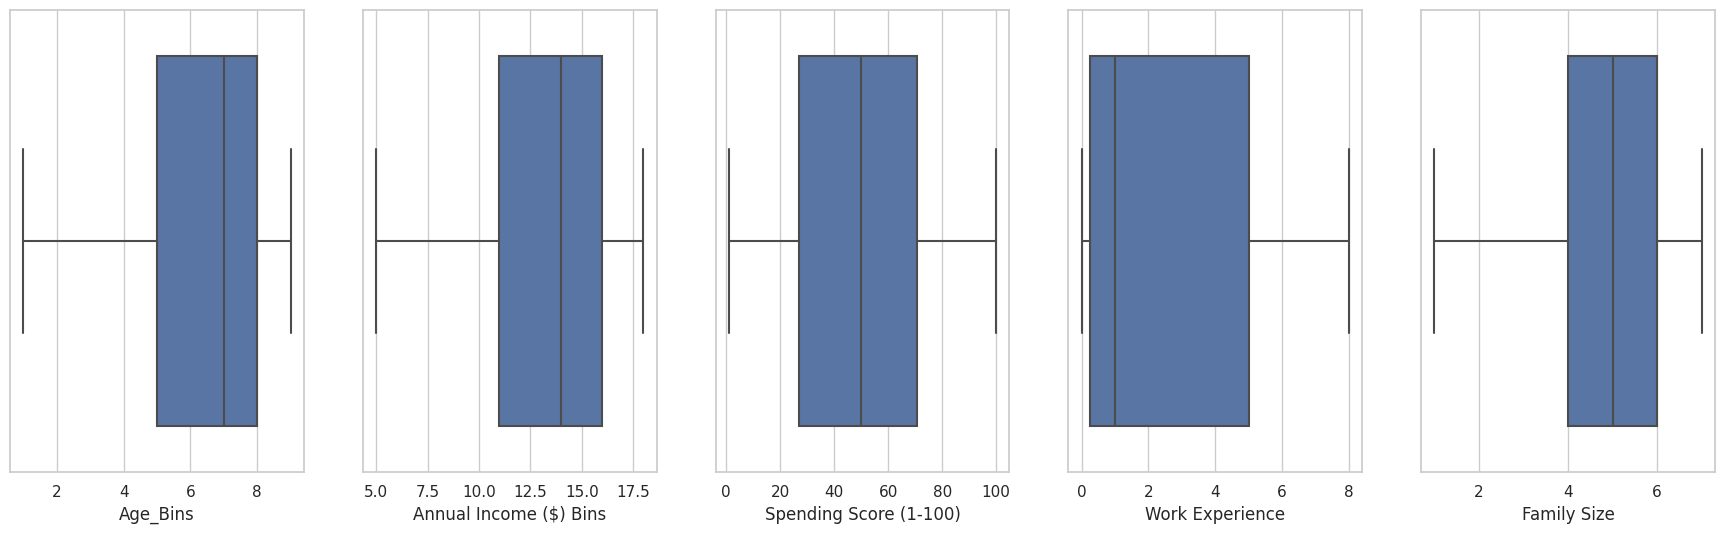

****************************************************************************************************
Group 1


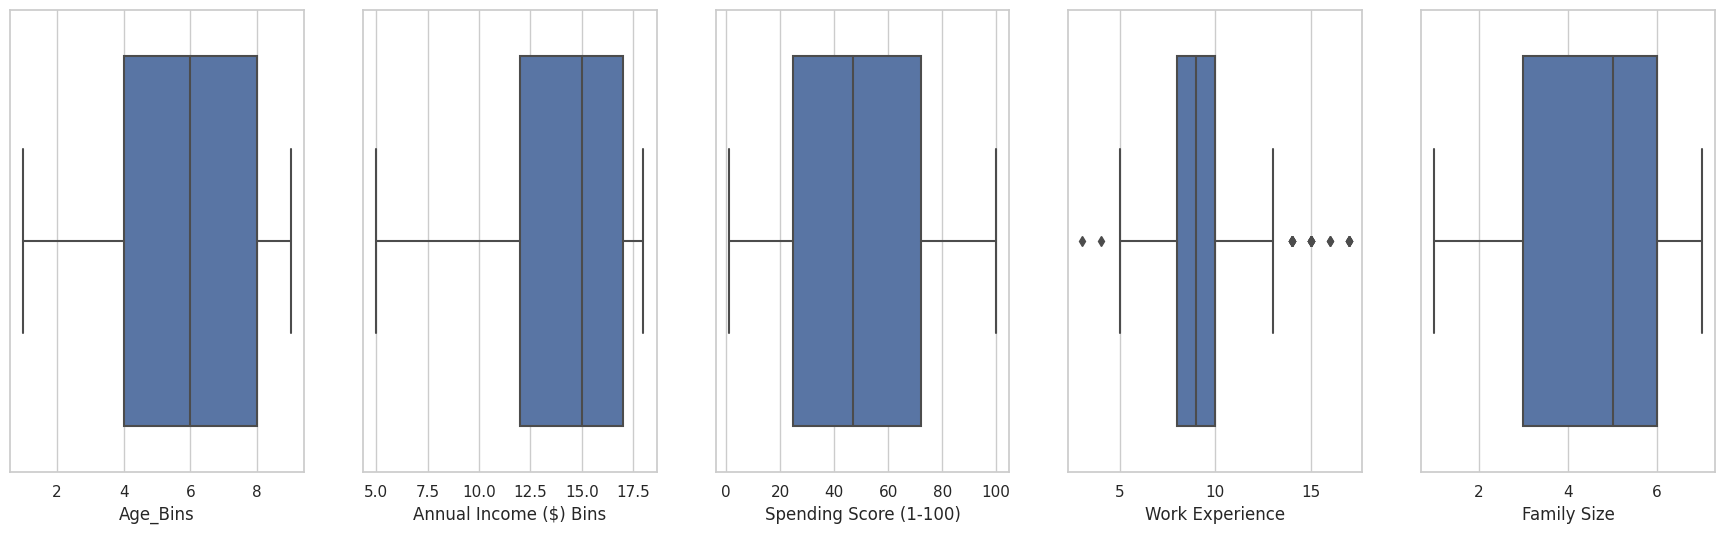

****************************************************************************************************
Group 2


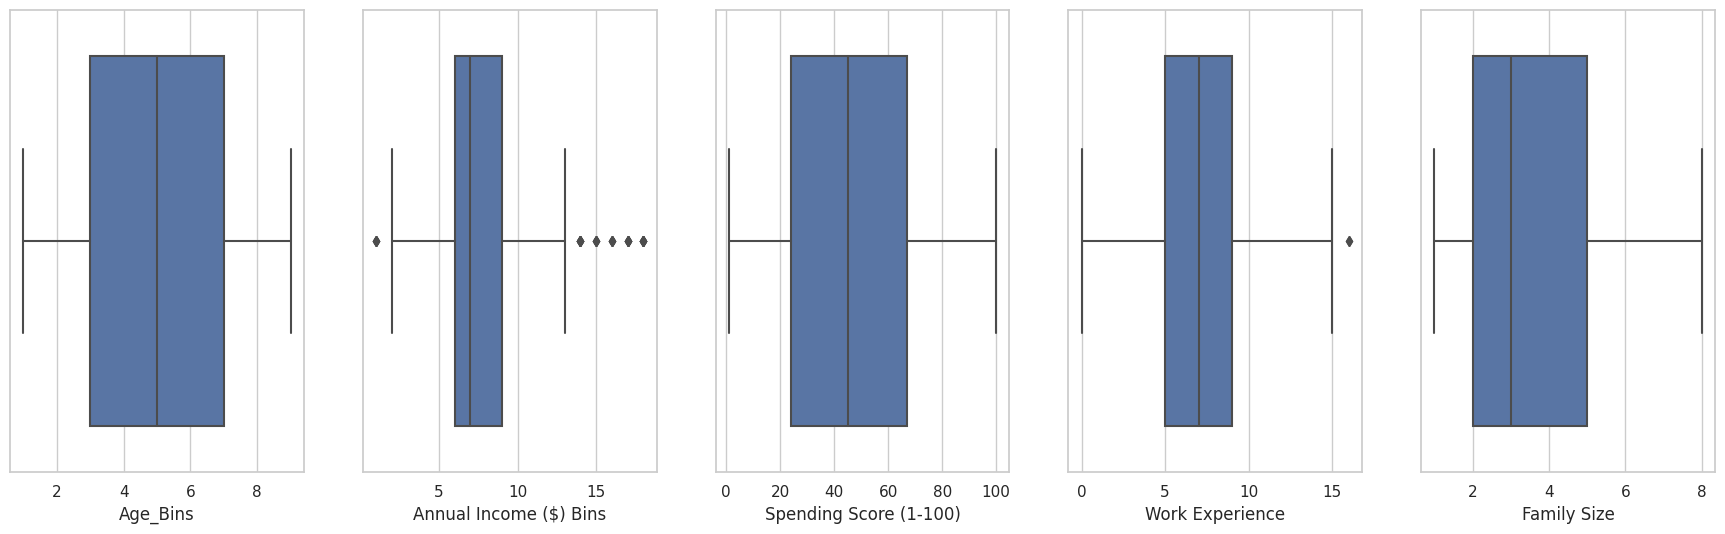

****************************************************************************************************
Group 3


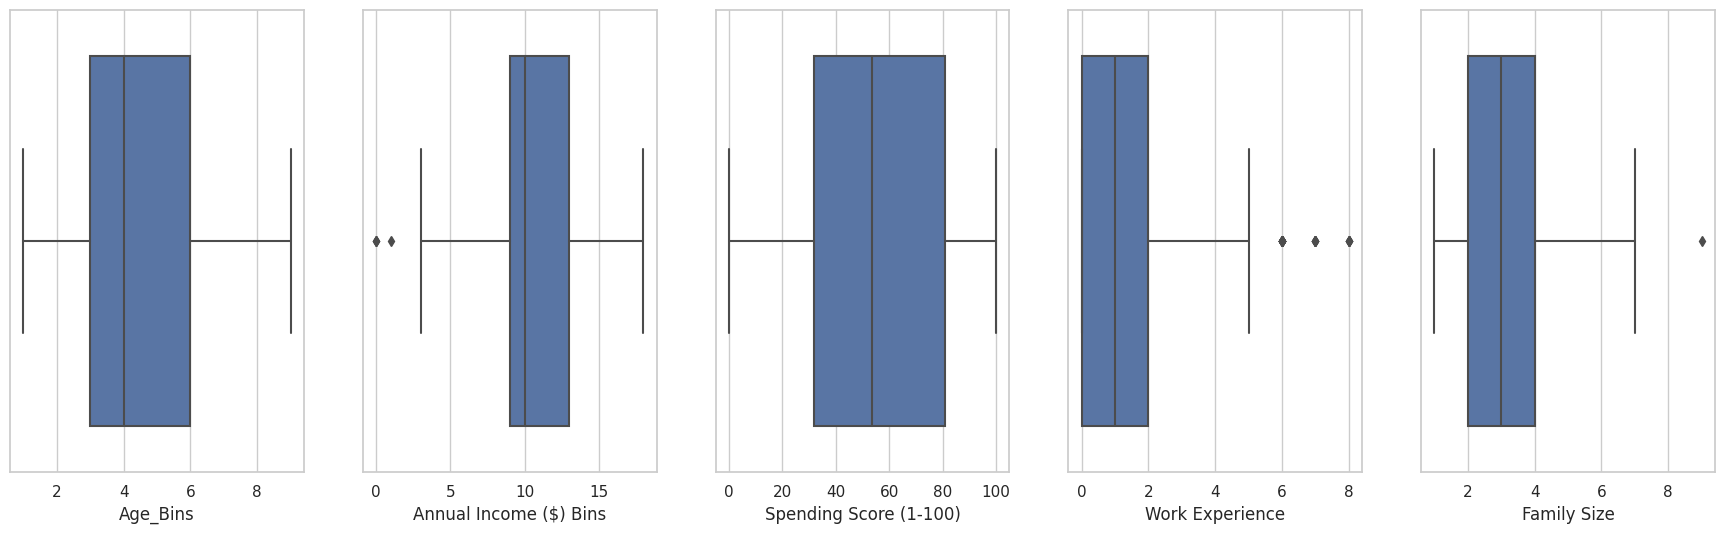

****************************************************************************************************
Group 4


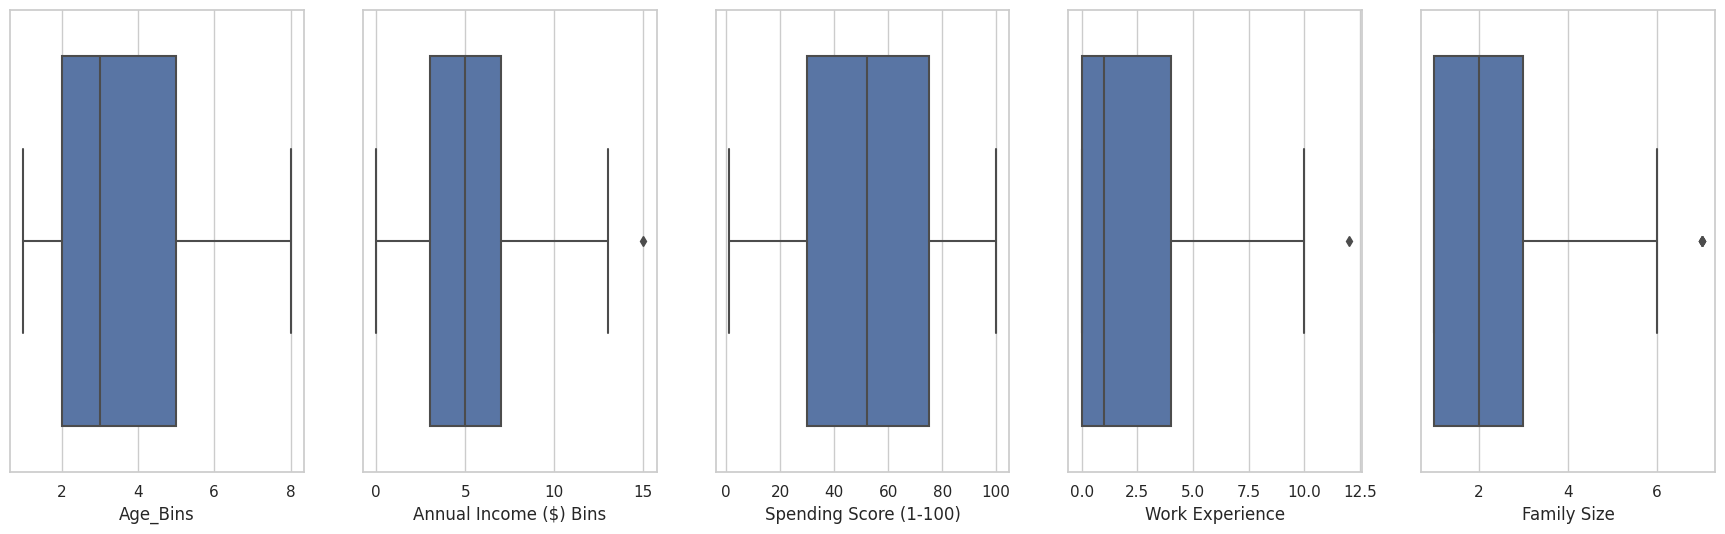

****************************************************************************************************


In [118]:
for i in range(5):
    print(f'Group {i}')
    df_new = df[df["Groups"] == i]
    fig, (ax1,ax2,ax3, ax4, ax5) = plt.subplots(1,5,figsize=(22, 6))
    sns.boxplot(x=df_new['Age_Bins'], ax=ax1)
    sns.boxplot(x=df_new['Annual Income ($) Bins'], ax=ax2)
    sns.boxplot(x=df_new['Spending Score (1-100)'], ax=ax3)
    sns.boxplot(x=df_new['Work Experience'], ax=ax4)
    sns.boxplot(x=df_new['Family Size'], ax=ax5)
    plt.show()
    print('*' * 100)